In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from src.signals.fundamental.dataset_features import build_multiticker_fundamental_dataset, create_benchmark_cumulative_returns
from src.signals.fundamental.train_model import predict_linear_quarter_returns
from src.signals.fundamental.backtest_strategies import backtest_all_tickers_long_short, compute_global_cumulative_return
from src.utils.plots import plot_backtest_grid, plot_strategy_vs_benchmark

Benchmark

In [ ]:
TICKERS = [
    "AIR.PA",     # Airbus
    "LDO.MI",     # Leonardo
    "BA",         # Boeing
    "RTX",        # RTX Corporation
    "LMT",        # Lockheed Martin
    "NOC",        # Northrop Grumman
    "GD",         # General Dynamics
    "TXT",        # Textron
    "HWM",        # Howmet Aerospace
    "SPR",        # Spirit AeroSystems
    "HEI",        # HEICO Corp
    "TDG",        # TransDigm Group
    "CAE.TO",     # CAE Inc.
    "ERJ",        # Embraer
    "AVAV"        # AeroVironment
]

benchmark = create_benchmark_cumulative_returns(TICKERS, '2023-05-01', '2025-05-01')

### 1. Long Short Strategy on Basket

Create Dataset with multitickers

In [ ]:
dataset = build_multiticker_fundamental_dataset(TICKERS)
df_predict, beta = predict_linear_quarter_returns(dataset)

Backtest  on each tickers of the basket

In [5]:
all_backtests = backtest_all_tickers_long_short(df_predict, TICKERS)

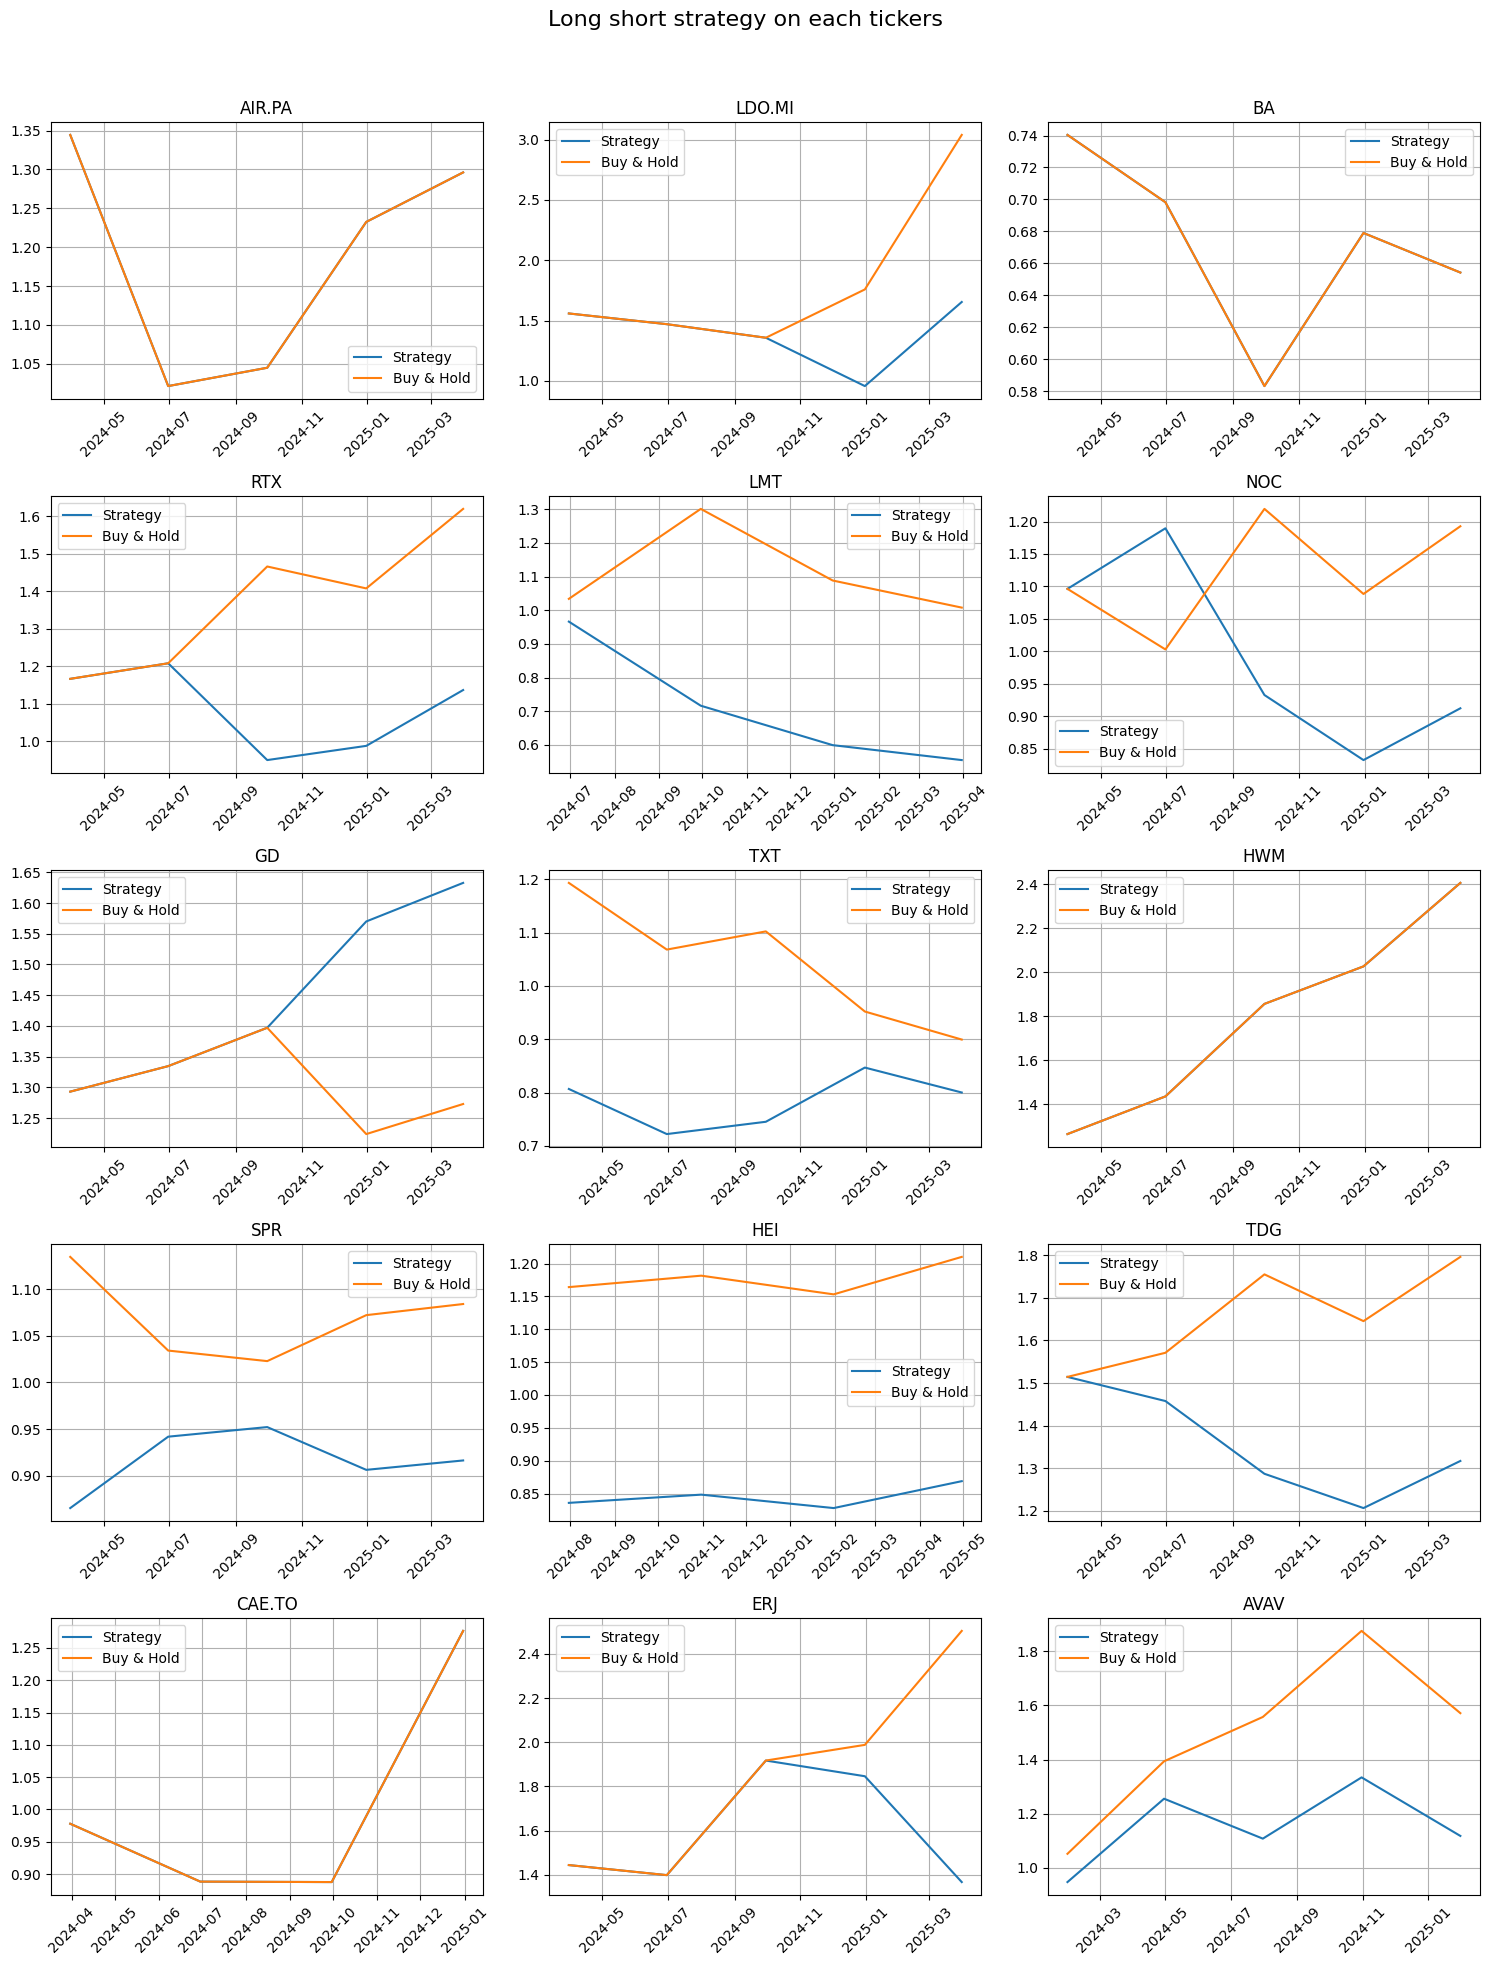

In [6]:
plot_backtest_grid(all_backtests)

Backtest on all basket

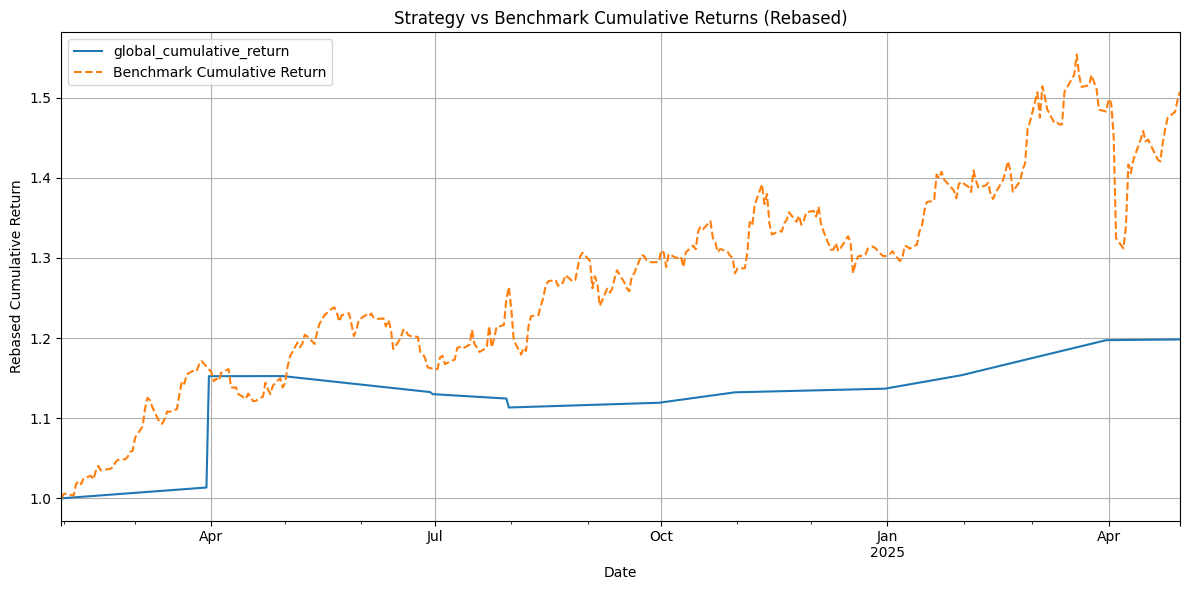

In [7]:
df_global = compute_global_cumulative_return(all_backtests)
plot_strategy_vs_benchmark(df_global, benchmark)